### Codio Activity 13.6: Use L1 Regularization to Select Features

**Expected Time = 90 minutes** 

**Total Points = 60** 

### This activity focuses on using the L1 regularization penalty to select features in a classification setting.  In the following, you will explore the value of different coefficients as you increase regularization.  Be sure to use the `liblinear` solver in your models throughout.

### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


import seaborn as sns

### The Data

### For this exercise you will use the built in dataset from seaborn containing information on passengers on the Titanic.  Here, you will only use the numeric features.  The data is loaded and prepared below.  We will only use one set for `X` and `y` to explore the effect of added regularization. 

In [2]:
data = sns.load_dataset('titanic').dropna()
# data = data.frame

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [4]:
X, y = data.select_dtypes(np.number).drop('survived', axis = 1), data.survived

[Back to top](#-Index)

### Problem 1

#### Scaling the Data

**10 Points**

### Because we are using regularization, it is important to have each of the features represented on the same scale.  To do so, use the `StandardScaler` to create `X_scaled` below.  

In [5]:
### GRADED

scaler = ''
X_scaled = ''

# YOUR CODE HERE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Answer check
X_scaled.mean()

4.3920910864291905e-17

### Problem 2

#### `C` values to explore

**20 Points**

### Next, you want to create an array of different `C` values to explore.  Remember that `C` is actually the inverse of regularization so small values are large amounts of regularization.  


### Use the array of `Cs` below to create models on `X_scaled` and `y`.  Keep track of the coefficients (as a list not array!) in a list `coef_list` below.  

### HINT: create a loop and in your code, use L1 penalty, liblinear solver, `random_state=42`, and `max_iter=1000`

In [6]:
Cs = np.logspace(-5, .5)

In [7]:
### GRADED

coef_list = []

# YOUR CODE HERE
coef_list = []
for C in Cs:
    lgr = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = C, random_state=42, max_iter = 1000).fit(X_scaled, y)
    coef_list.append(list(lgr.coef_[0]))

### ANSWER CHECK
coef_list[0]

[0.0, 0.0, 0.0, 0.0, 0.0]

[Back to top](#-Index)

### Problem 3

#### DataFrame of Coefficients

**10 Points**

### Next, create a DataFrame based on the coefficients in `coef_list`.  Set the index of this DataFrame to the `Cs` values.  

In [8]:
### GRADED

coef_df = ''

# YOUR CODE HERE
coef_df = pd.DataFrame(coef_list, columns = X.columns)
coef_df.index = Cs

### ANSWER CHECK
coef_df.head()

,pclass,age,sibsp,parch,fare
0.000010,0.0,0.0,0.0,0.0,0.0
0.000013,0.0,0.0,0.0,0.0,0.0
0.000017,0.0,0.0,0.0,0.0,0.0
0.000022,0.0,0.0,0.0,0.0,0.0
0.000028,0.0,0.0,0.0,0.0,0.0


[Back to top](#-Index)

### Problem 4

#### Visualizing the Results

**10 Points**

### Below, the data from the coefficients is plotted.  Based on this plot, which feature seems more important -- `age` or `parch`?  Assign your answer as a string to `ans4` below.

<center>
    <img src = 'images/coefl1.png' />
</center>

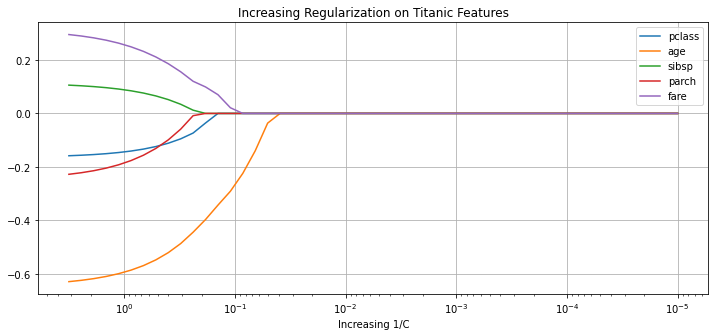

In [9]:
plt.figure(figsize = (12, 5))
plt.semilogx(coef_df)
plt.gca().invert_xaxis()
plt.grid()
plt.legend(list(coef_df.columns));
plt.title('Increasing Regularization on Titanic Features')
plt.xlabel("Increasing 1/C")
plt.savefig('images/coefl1.png')

In [10]:
### GRADED

ans4 = ''

# YOUR CODE HERE
ans4 = 'age'

### ANSWER CHECK
print(ans4)

age


[Back to top](#-Index)

### Problem 5

#### Using `SelectFromModel`

**10 Points**

### In a similar manner, you can use `SelectFromModel` together with `LogisticRegression` to select features based on coefficient values.  Below, create an instance of the 
### `SelectFromModel` selector with a `LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43)` as the estimator.  Fit and transform the data to 
### select the 2 most important features.  Assign their names as a list to `three_best` below.

In [11]:
### GRADED

selector = ''
best_features = ''
# YOUR CODE HERE
selector = SelectFromModel(LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear', random_state = 43))
ans = selector.fit_transform(X_scaled, y)
best_features = ['age', 'fare']

### ANSWER CHECK
print(selector.get_feature_names_out())

['x1' 'x4']
